In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import time
import logging
from sklearn.datasets import fetch_olivetti_faces

logging.basicConfig(level=logging.INFO,format='%(asctime)s %(messgae)s')

data_home='datasets/'
logging.info('开始加载数据集')
faces=fetch_olivetti_faces(data_home=data_home)
logging.info('数据集加载完成')

--- Logging error ---
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 992, in emit
    msg = self.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 838, in format
    return fmt.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 578, in format
    s = self.formatMessage(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 547, in formatMessage
    return self._style.format(record)
  File "C:\ProgramData\Anaconda3\lib\logging\__init__.py", line 391, in format
    return self._fmt % record.__dict__
KeyError: 'messgae'
Call stack:
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "

In [3]:
X= faces.data
y = faces.target
targets = np.unique(faces.target)
target_names = np.array(["c%d" % t for t in targets])
target_names

array(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10',
       'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19',
       'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28',
       'c29', 'c30', 'c31', 'c32', 'c33', 'c34', 'c35', 'c36', 'c37',
       'c38', 'c39'],
      dtype='<U3')

In [4]:
n_targets =target_names.shape[0]
n_samples,h,w=faces.images.shape
print('数据总条数：{}\n目标分类数：{}'.format(n_samples,n_targets))
print('图片尺寸：{}x{}\n图片数据类型：{}\n'.format(w,h,X.shape))
print('y的标签值：',y)

数据总条数：400
目标分类数：40
图片尺寸：64x64
图片数据类型：(400, 4096)

y的标签值： [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2
  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7
  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12
 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17
 17 17 17 17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19
 20 20 20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22
 22 22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
 25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27 27
 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29 29 29
 30 30 30 30 30 30 30 30 30 30 

In [5]:
def plot_gallery(images,title,h,w,n_row=2,n_col=5):
    plt.figure(figsize=(2 *n_col,2.2 * n_row),dpi=144)
    plt.subplots_adjust(bottom=0,left=.01,right=.99,top=.90,hspace=.01)
    for i in range(n_row * n_col):
        plt.subplot(n_row,n_col,i+1)
        oneImage = images[i].reshape(h,w)
        plt.imshow(oneImage, cmap=plt.cm.gray)
        plt.title(title[i])
        plt.axis('off')

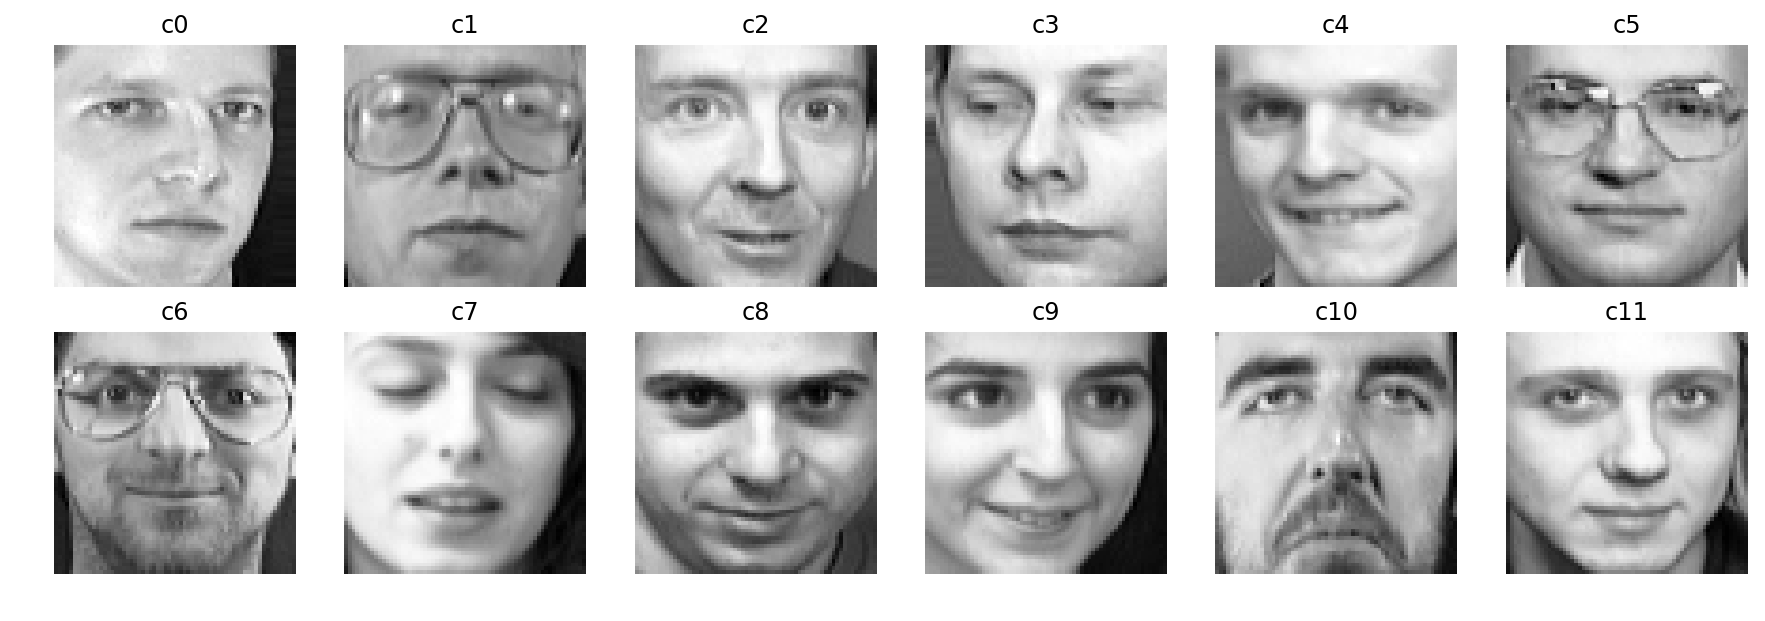

In [6]:
n_row=2
n_col=6

sample_images=None
sample_titles = []
for i in range(n_targets):
    people_images =X[y==i]
    totalImages=people_images.shape[0]
    people_sample_index= np.random.randint(0,totalImages,1)
    people_sample_image =people_images[people_sample_index,:]
    if sample_images is not None:
        sample_images = np.concatenate((sample_images,people_sample_image),axis=0)
    else:
        sample_images = people_sample_image
    sample_titles.append(target_names[i])    
    
plot_gallery(sample_images,sample_titles,h,w,n_row,n_col)    

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=4)

In [8]:
from sklearn.svm import SVC
start =time.clock()
print('svm模型训练开始...')
clf = SVC(class_weight='balanced')
clf.fit(X_train,y_train)
print('完成时间：{0:.2f}s'.format(time.clock()-start))

svm模型训练开始...
完成时间：1.23s


In [9]:
start = time.clock()
print('对测试数据进行测试...')
y_pred = clf.predict(X_test)
print('完成时间：{0:.2f}s'.format(time.clock()-start))

对测试数据进行测试...
完成时间：0.17s


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred,labels=range(n_targets))
print("混淆矩阵:\n")
print(cm)

混淆矩阵:

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names=target_names))

             precision    recall  f1-score   support

         c0       0.00      0.00      0.00         1
         c1       0.00      0.00      0.00         3
         c2       0.00      0.00      0.00         2
         c3       0.00      0.00      0.00         1
         c4       0.00      0.00      0.00         1
         c5       0.00      0.00      0.00         1
         c6       0.00      0.00      0.00         4
         c7       0.00      0.00      0.00         2
         c8       0.00      0.00      0.00         4
         c9       0.00      0.00      0.00         2
        c10       0.00      0.00      0.00         1
        c11       0.00      0.00      0.00         0
        c12       0.00      0.00      0.00         4
        c13       0.00      0.00      0.00         4
        c14       0.00      0.00      0.00         1
        c15       0.00      0.00      0.00         1
        c16       0.00      0.00      0.00         3
        c17       0.00      0.00      0.00   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [12]:
from sklearn.decomposition import PCA

print('探索PCA模型的explained_variance_ratio_变量里获取经PCA处理后的数据还原率...')
candidate_components = range(10,300,30)
explained_ratios =[]
start =time.clock()
for c in candidate_components:
    pca=PCA(n_components=c)
    X_pca =pca.fit_transform(X)
    total=np.sum(pca.explained_variance_ratio_)
    explained_ratios.append(total)
print('处理用时：{0:.2f}s'.format(time.clock()-start))    

探索PCA模型的explained_variance_ratio_变量里获取经PCA处理后的数据还原率...
处理用时：1.59s


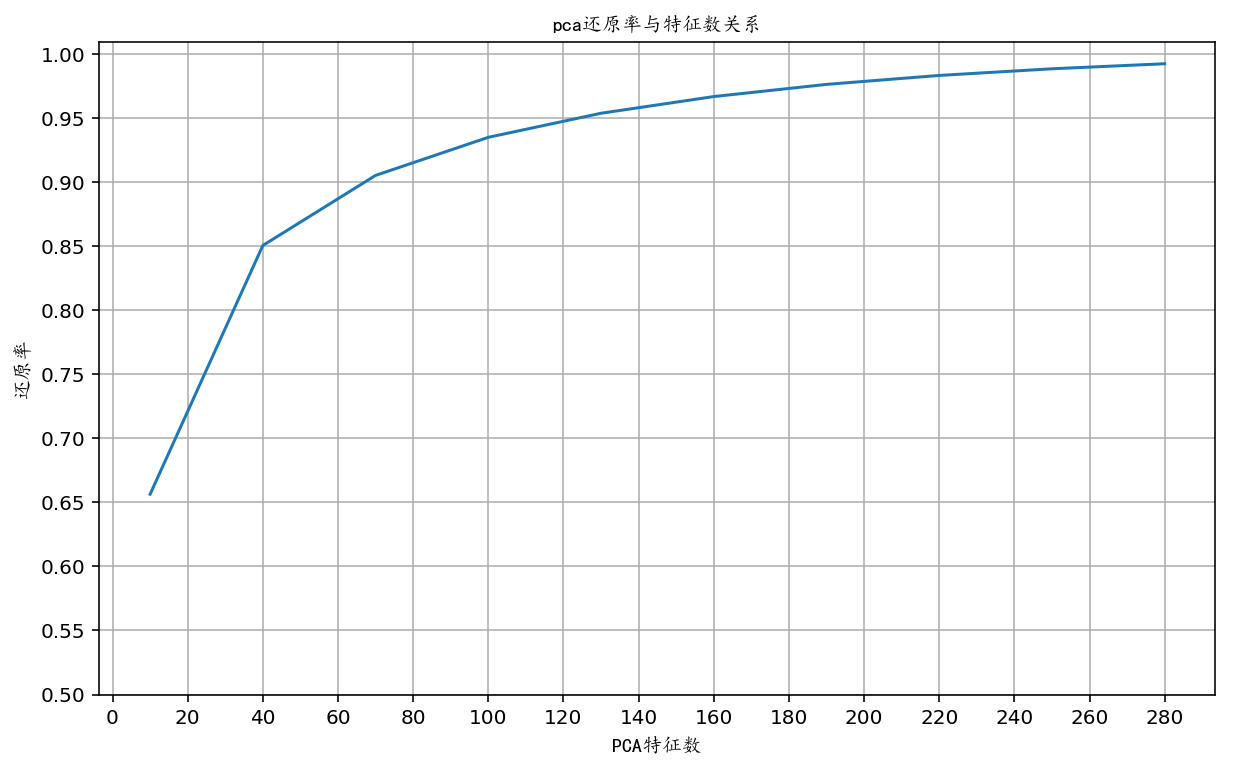

In [13]:
import matplotlib.font_manager as fm
myfont =fm.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
plt.figure(figsize=(10,6),dpi=144)
plt.grid()
plt.plot(candidate_components,explained_ratios)
plt.xlabel('PCA特征数',fontproperties=myfont)
plt.ylabel('还原率',fontproperties=myfont)
plt.title('pca还原率与特征数关系',fontproperties=myfont)
plt.yticks(np.arange(0.5,1.05,.05))
plt.xticks(np.arange(0,300,20));

In [14]:
def title_prefix(prefix,title):
    return "{}:{}".format(prefix,title)

PCA训练开始(特征数=140)...
完成时间:0.14s
PCA训练开始(特征数=75)...
完成时间:0.10s
PCA训练开始(特征数=37)...
完成时间:0.08s
PCA训练开始(特征数=19)...
完成时间:0.07s
PCA训练开始(特征数=8)...
完成时间:0.04s
绘制采用不同的特征数时的图片还原效果....


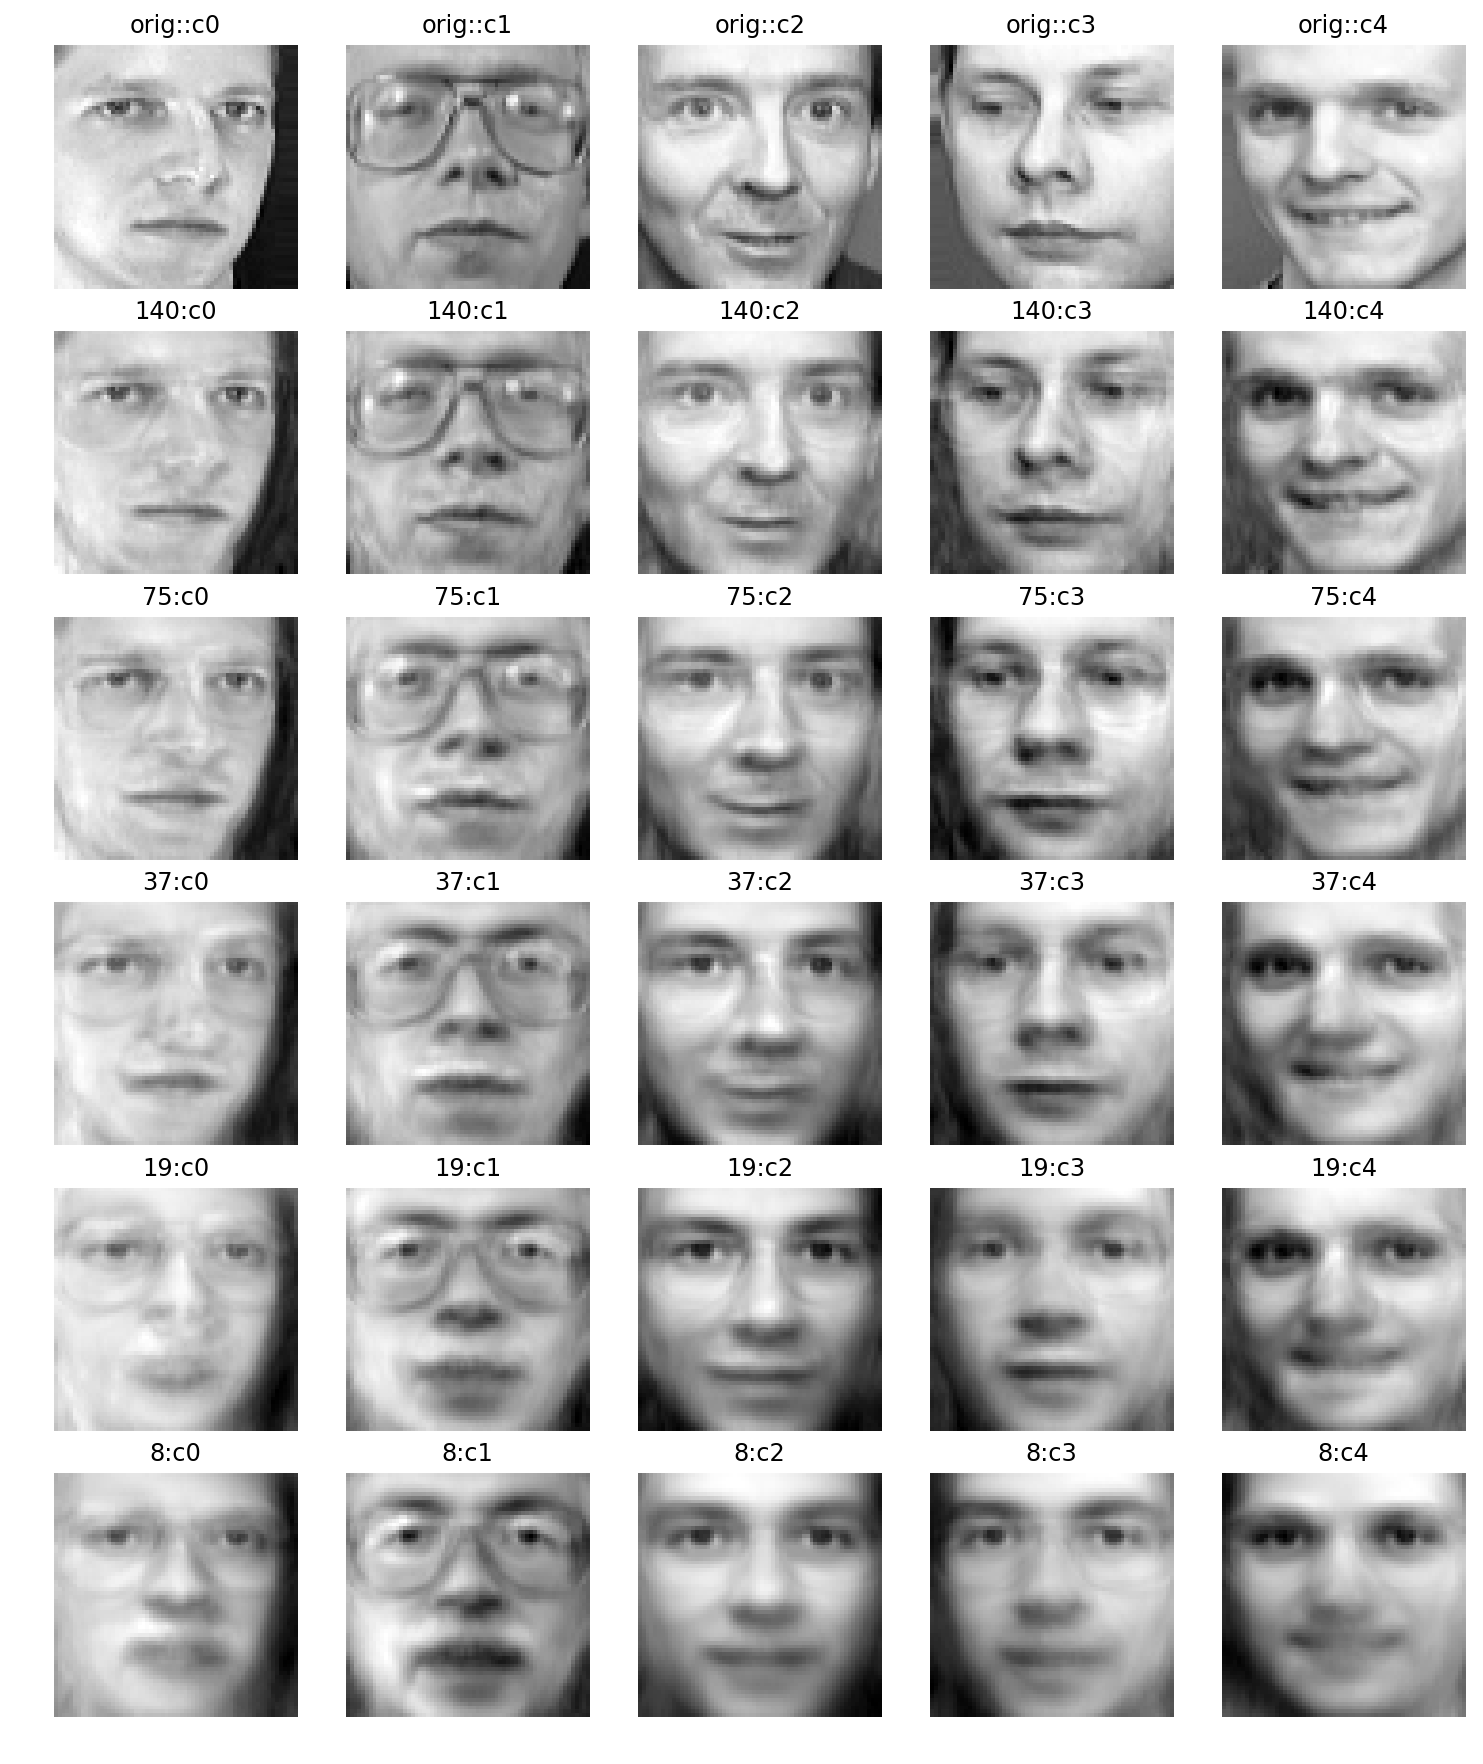

In [15]:
n_row=1
n_col=5

sample_images= sample_images[0:5]
sample_titles = sample_titles[0:5]

plotting_images =sample_images
plotting_titles =[title_prefix('orig:',t) for t in sample_titles]
candidate_components=[140 ,75,37,19,8]
for c in candidate_components:
    print("PCA训练开始(特征数={})...".format(c))
    start=time.clock()
    pca=PCA(n_components=c)
    pca.fit(X)
    X_sample_pca=pca.transform(sample_images)
    X_sample_inv=pca.inverse_transform(X_sample_pca)
    plotting_images=np.concatenate((plotting_images,X_sample_inv),axis=0)
    sample_title_pca=[title_prefix('{}'.format(c),t) for t in sample_titles]
    plotting_titles =np.concatenate((plotting_titles,sample_title_pca),axis=0)
    print("完成时间:{0:.2f}s".format(time.clock()-start))
    
print("绘制采用不同的特征数时的图片还原效果....")    
plot_gallery(plotting_images,plotting_titles,h,w,
            n_row *(len(candidate_components)+1),n_col)

In [16]:
n_components=140
print("使用k=140作为PCA参数，对训练集和测试集进行特征提取...")
start=time.clock()
pca=PCA(n_components=n_components,svd_solver='randomized',whiten=True).fit(X_train)
print("完成时间{0:.2f}s".format(time.clock()-start))

print("使用PCA对输入数据进行特征提取....")
start=time.clock()
X_train_pca=pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("完成时间{0:.2f}s".format(time.clock()-start))

print()

print("当前提取的特征数:",pca.n_components_)
print("当前最大方差的特征：",pca.components_[0:10])
print('保留的n个成分各自的百分比：',pca.explained_variance_ratio_)   #这表明值保留一个维度也可以保留数据中信息的93%
print('代表降维后的各主成分的方差值。方差值越大，则说明越是重要的成分',pca.explained_variance_)


使用k=140作为PCA参数，对训练集和测试集进行特征提取...
完成时间0.14s
使用PCA对输入数据进行特征提取....
完成时间0.01s

当前提取的特征数: 140
当前最大方差的特征： [[-0.00518636 -0.00835254 -0.01080207 ..., -0.00055502  0.0031153
   0.00427179]
 [-0.02792566 -0.03247197 -0.03693601 ...,  0.02697616  0.02439472
   0.02277473]
 [ 0.00225726 -0.00075993 -0.00108072 ..., -0.01566491 -0.0128087
  -0.01048413]
 ..., 
 [ 0.03235204  0.03503563  0.03029958 ..., -0.01742279 -0.01903738
  -0.01524006]
 [-0.00795224 -0.02076405 -0.02756402 ...,  0.01666392  0.01763188
   0.01878664]
 [ 0.02043041  0.02380079  0.02233641 ..., -0.02315669 -0.02222282
  -0.02298404]]
保留的n个成分各自的百分比： [ 0.24084637  0.14279014  0.07953174  0.04966733  0.03808438  0.03062259
  0.0249523   0.02143448  0.01896346  0.01642116  0.01591407  0.01508218
  0.01244429  0.01118825  0.01057791  0.00992807  0.00888827  0.00777815
  0.00770258  0.0073597   0.00712612  0.0064732   0.00591434  0.00583164
  0.00563683  0.00524441  0.00492993  0.00485074  0.00468753  0.00424636
  0.00421578  0.003751

In [17]:
clf=SVC(class_weight='balanced' )  #根据训练样本的数量来均衡的调整权重
clf.fit(X_train_pca,y_train)
y_pred=clf.predict(X_test_pca)
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.67      0.80         3
          2       1.00      0.50      0.67         2
          3       0.33      1.00      0.50         1
          4       1.00      1.00      1.00         1
          5       1.00      1.00      1.00         1
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         4
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       0.75      1.00      0.86         3
         17       1.00      1.00      1.00         2
         18       1.00      1.00      1.00   

In [18]:
from sklearn.model_selection import GridSearchCV

print("搜索SVC模型的最优参数...")
param_grid={'C':[1,5,10,50,100],
           'gamma':[0.0001,0.0005,0.001,0.005,0.01]}
clf=GridSearchCV(SVC(kernel='rbf',class_weight='balanced'),param_grid,verbose=2,n_jobs=4)
clf=clf.fit(X_train_pca,y_train)
print("网络搜索的最优参数：")
print(clf.best_params_)

搜索SVC模型的最优参数...
Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    7.2s


网络搜索的最优参数：
{'C': 10, 'gamma': 0.001}


[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:    7.9s finished


In [19]:
start=time.clock()
print('对测试集进行预测...')
y_pred=clf.best_estimator_.predict(X_test_pca)
cm=confusion_matrix(y_test,y_pred,labels=range(n_targets))   #生产混淆矩阵
print('完成时间紧：{0:.2f}.\n'.format(time.clock()-start))
print("混淆矩阵")
print(cm)

对测试集进行预测...
完成时间紧：0.01.

混淆矩阵
[[1 0 0 ..., 0 0 0]
 [1 2 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 1 0 0]
 [0 0 0 ..., 0 2 0]
 [0 0 0 ..., 0 0 2]]


In [20]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.67      0.80         3
          2       1.00      0.50      0.67         2
          3       1.00      1.00      1.00         1
          4       0.50      1.00      0.67         1
          5       1.00      1.00      1.00         1
          6       1.00      0.75      0.86         4
          7       1.00      1.00      1.00         2
          8       1.00      1.00      1.00         4
          9       1.00      1.00      1.00         2
         10       1.00      1.00      1.00         1
         12       1.00      1.00      1.00         4
         13       1.00      1.00      1.00         4
         14       1.00      1.00      1.00         1
         15       1.00      1.00      1.00         1
         16       0.75      1.00      0.86         3
         17       1.00      1.00      1.00         2
         18       1.00      1.00      1.00   